<a href="https://colab.research.google.com/github/luimui/LLM/blob/main/FineTuneBook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%%writefile requirements.txt

datasets
huggingface-hub

Overwriting requirements.txt


In [8]:
%%capture
!pip install -r requirements.txt

In [40]:
import datasets
import huggingface_hub
import pandas as pd
import matplotlib.pyplot as plt


all_datasets = huggingface_hub.list_datasets()
all_datasets = list(all_datasets)
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 79052 datasets currently available on the Hub
The first 10 are: [DatasetInfo(id='acronym_identification', author=None, sha='c3c245a18bbd57b1682b099e14460eebf154cbdf', last_modified=datetime.datetime(2023, 1, 25, 14, 18, 28, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=1963, likes=17, paperswithcode_id='acronym-identification', tags=['task_categories:token-classification', 'annotations_creators:expert-generated', 'language_creators:found', 'multilinguality:monolingual', 'size_categories:10K<n<100K', 'source_datasets:original', 'language:en', 'license:mit', 'acronym-identification', 'arxiv:2010.14678', 'region:us'], card_data=None, siblings=None), DatasetInfo(id='ade_corpus_v2', author=None, sha='080cf99e1483008322d612c7262c04c8902fdbee', last_modified=datetime.datetime(2023, 6, 1, 14, 59, 53, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=2134, likes=20, paperswithcode_id=None, tags=['task_categories

In [16]:
%%capture
emotions = datasets.load_dataset("emotion")

In [17]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [18]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [19]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [22]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [24]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [30]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [37]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [38]:
df["label_name"] = df["label"].apply(label_int2str)

In [39]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


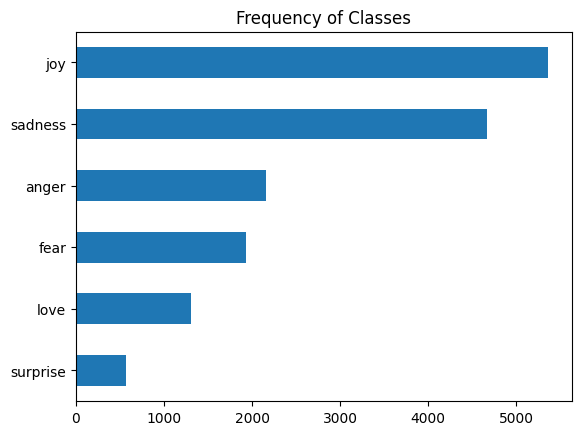

In [41]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()